프로그래밍3 최종분석과제

201984051 산업데이터사이언스학부 신동진 입니다.

telco 데이터를 확인해본 후 어떻게 분석하는게 더 좋을지 판단한 후에 데이터 분석을 시작했습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [3]:
phone = pd.read_csv('gogo/phone.csv')
phone

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


info를 통해 phone의 데이터 정보를 확인해봤습니다.

In [4]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


phone 데이터 상위 5개만 보기

In [5]:
phone.head(5)

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


데이터를 보고 각 컬럼의 영어네임을 한글로 변경해봤습니다.

In [6]:
phone.rename(columns={'Leave':'가입해지여부(1이면 해지)','MemberWeeks':'가입기간','NewContract':'가입갱신여부(1이면 갱신)',
                       'IsData':'데이터요금제사용여부(1이면 사용)','DataAmount':'데이터사용량(GB)','DataAmount':'데이터사용량(GB)',
                       'Callcenter':'고객센터전화량','CalMins':'월평균전화량(분)','CalCounts':'월평균전화수(횟수)',
                       'MonthlyFee':'월평균요금','OverFee':'초과요금','RoamingMin':'로밍시간(분)'},inplace=True)

한글로 변경한값들이 잘 입력되었는지 확인해봤습니다.

In [7]:
phone

,가입해지여부(1이면 해지),가입기간,가입갱신여부(1이면 갱신),데이터요금제사용여부(1이면 사용),데이터사용량(GB),고객센터전화량,월평균전화량(분),월평균전화수(횟수),월평균요금,초과요금,로밍시간(분)
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


iloc을 이용해 11개의 데이터들을 확인했습니다.

In [8]:
phone.iloc[0:11]

,가입해지여부(1이면 해지),가입기간,가입갱신여부(1이면 갱신),데이터요금제사용여부(1이면 사용),데이터사용량(GB),고객센터전화량,월평균전화량(분),월평균전화수(횟수),월평균요금,초과요금,로밍시간(분)
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [9]:
phone.dtypes.value_counts()

int64      6
float64    5
dtype: int64

value_counts를 사용해 Dtype을 확인해보니 int64는 6개 float64 5개가 있는것을 확인 할 수 있었습니다.

In [10]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   가입해지여부(1이면 해지)      3333 non-null   int64  
 1   가입기간                3333 non-null   int64  
 2   가입갱신여부(1이면 갱신)      3333 non-null   int64  
 3   데이터요금제사용여부(1이면 사용)  3333 non-null   int64  
 4   데이터사용량(GB)          3333 non-null   float64
 5   고객센터전화량             3333 non-null   int64  
 6   월평균전화량(분)           3333 non-null   float64
 7   월평균전화수(횟수)          3333 non-null   int64  
 8   월평균요금               3333 non-null   float64
 9   초과요금                3333 non-null   float64
 10  로밍시간(분)             3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [11]:
phone.columns

Index(['가입해지여부(1이면 해지)', '가입기간', '가입갱신여부(1이면 갱신)', '데이터요금제사용여부(1이면 사용)',
       '데이터사용량(GB)', '고객센터전화량', '월평균전화량(분)', '월평균전화수(횟수)', '월평균요금', '초과요금',
       '로밍시간(분)'],
      dtype='object')

In [12]:
phone.shape

(3333, 11)

phone 데이터는 3333개의 row 11개의 columns를 가지고 있습니다.

In [13]:
phone.isnull().sum()

가입해지여부(1이면 해지)        0
가입기간                  0
가입갱신여부(1이면 갱신)        0
데이터요금제사용여부(1이면 사용)    0
데이터사용량(GB)            0
고객센터전화량               0
월평균전화량(분)             0
월평균전화수(횟수)            0
월평균요금                 0
초과요금                  0
로밍시간(분)               0
dtype: int64

phone 데이터의 결측치는 없습니다.

In [14]:
phone.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부(1이면 해지),3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
가입기간,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
가입갱신여부(1이면 갱신),3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
데이터요금제사용여부(1이면 사용),3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
데이터사용량(GB),3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
월평균전화량(분),3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
월평균요금,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
초과요금,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


describe().T 를 이용해 수치형 데이터의 기술 통계를 구해서 각 컬럼들의 수치들을 확인해봤습니다.

좀더 상세한 수치를 보기위해 1%,5%,10%,25%,50%,75%,90%,95%,99% 별로 확인해봤습니다.

In [15]:
phone.describe(include=[np.number],
                 percentiles=[
                     .01,
                     .05,
                     .10,
                     .25,
                     .50,
                     .75,
                     .90,
                     .95,
                     .99
                 ]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
가입해지여부(1이면 해지),3333.0,0.144914,0.352067,0.0,0.0000,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.0000,1.00
가입기간,3333.0,101.064806,39.822106,1.0,12.3200,35.00,50.00,74.00,101.00,127.00,152.00,167.00,195.0000,243.00
가입갱신여부(1이면 갱신),3333.0,0.903090,0.295879,0.0,0.0000,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0000,1.00
데이터요금제사용여부(1이면 사용),3333.0,0.276628,0.447398,0.0,0.0000,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.0000,1.00
데이터사용량(GB),3333.0,0.816475,1.272668,0.0,0.0000,0.00,0.00,0.00,0.00,1.78,3.05,3.46,4.1000,5.40
고객센터전화량,3333.0,1.562856,1.315491,0.0,0.0000,0.00,0.00,1.00,1.00,2.00,3.00,4.00,6.0000,9.00
월평균전화량(분),3333.0,179.775098,54.467389,0.0,51.8320,89.92,110.32,143.70,179.40,216.40,249.58,270.74,305.1680,350.80
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,54.0000,67.00,74.20,87.00,101.00,114.00,126.00,133.00,146.0000,165.00
월평균요금,3333.0,56.305161,16.426032,14.0,26.0000,33.26,38.00,45.00,53.50,66.20,80.50,87.80,98.2800,111.30
초과요금,3333.0,10.051488,2.535712,0.0,3.9796,5.94,6.84,8.33,10.07,11.77,13.29,14.22,15.9468,18.19


np.finfo, np.iinfo 를 사용해 numpy에서 사용하는 float,int값들의 정보를 확인합니다.

In [16]:
np.finfo('float64')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [17]:
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [18]:
np.finfo('float16')

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [19]:
np.iinfo('int64')

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [20]:
np.iinfo('int32')

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [21]:
np.iinfo('int16')

iinfo(min=-32768, max=32767, dtype=int16)

float16,int16을 써도 되는지 확인하기 위해, head와 describe로 확인해봤습니다.

In [22]:
phone.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부(1이면 해지),3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
가입기간,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
가입갱신여부(1이면 갱신),3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
데이터요금제사용여부(1이면 사용),3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
데이터사용량(GB),3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
월평균전화량(분),3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
월평균요금,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
초과요금,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


소수점 둘째 자리까지 쓰고 있으니 float16와 int16 써도 전혀 무리가 없겠습니다. 그러면, 모든 float64와 int64를 16으로 바꿔서 결과를 알아봅시다. read_csv에서 dtype을 아래 코드와 같이 설정할 수 있습니다.

In [23]:
phone = phone.astype({
                           '데이터사용량(GB)': np.float16,
                           '월평균전화량(분)': np.float16,
                           '월평균요금': np.float16,
                           '초과요금': np.float16,
                           '로밍시간(분)': np.float16,
                           '가입해지여부(1이면 해지)': np.int16,
                           '가입기간': np.int16,
                           '가입갱신여부(1이면 갱신)': np.int16,
                           '데이터요금제사용여부(1이면 사용)': np.int16,
                           '고객센터전화량': np.int16,
                           '월평균전화수(횟수)': np.int16
                       })
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   가입해지여부(1이면 해지)      3333 non-null   int16  
 1   가입기간                3333 non-null   int16  
 2   가입갱신여부(1이면 갱신)      3333 non-null   int16  
 3   데이터요금제사용여부(1이면 사용)  3333 non-null   int16  
 4   데이터사용량(GB)          3333 non-null   float16
 5   고객센터전화량             3333 non-null   int16  
 6   월평균전화량(분)           3333 non-null   float16
 7   월평균전화수(횟수)          3333 non-null   int16  
 8   월평균요금               3333 non-null   float16
 9   초과요금                3333 non-null   float16
 10  로밍시간(분)             3333 non-null   float16
dtypes: float16(5), int16(6)
memory usage: 71.7 KB


In [24]:
phone.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부(1이면 해지),3333.0,0.144914,0.352067,0.0,0.000000,0.000000,0.000000,1.000000
가입기간,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.000000
가입갱신여부(1이면 갱신),3333.0,0.903090,0.295879,0.0,1.000000,1.000000,1.000000,1.000000
데이터요금제사용여부(1이면 사용),3333.0,0.276628,0.447398,0.0,0.000000,0.000000,1.000000,1.000000
데이터사용량(GB),3333.0,0.816895,1.273438,0.0,0.000000,0.000000,1.780273,5.398438
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.000000
월평균전화량(분),3333.0,inf,54.468750,0.0,143.750000,179.375000,216.375000,350.750000
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.000000,101.000000,114.000000,165.000000
월평균요금,3333.0,inf,16.421875,14.0,45.000000,53.500000,66.187500,111.312500
초과요금,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.187500


float과 int를 모두 16으로 바꿔보니 Dtype이 float인 월평균전화량(분)과 월평균요금이 inf값으로 나오는것을 확인 할 수 있었습니다.
그래서 두개의 데이터는 32로 바꿔줬습니다.

In [25]:
phone = phone.astype({
                           '데이터사용량(GB)': np.float16,
                           '월평균전화량(분)': np.float32,
                           '월평균요금': np.float32,
                           '초과요금': np.float16,
                           '로밍시간(분)': np.float16,
                           '가입해지여부(1이면 해지)': np.int16,
                           '가입기간': np.int16,
                           '가입갱신여부(1이면 갱신)': np.int16,
                           '데이터요금제사용여부(1이면 사용)': np.int16,
                           '고객센터전화량': np.int16,
                           '월평균전화수(횟수)': np.int16
                       })
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   가입해지여부(1이면 해지)      3333 non-null   int16  
 1   가입기간                3333 non-null   int16  
 2   가입갱신여부(1이면 갱신)      3333 non-null   int16  
 3   데이터요금제사용여부(1이면 사용)  3333 non-null   int16  
 4   데이터사용량(GB)          3333 non-null   float16
 5   고객센터전화량             3333 non-null   int16  
 6   월평균전화량(분)           3333 non-null   float32
 7   월평균전화수(횟수)          3333 non-null   int16  
 8   월평균요금               3333 non-null   float32
 9   초과요금                3333 non-null   float16
 10  로밍시간(분)             3333 non-null   float16
dtypes: float16(3), float32(2), int16(6)
memory usage: 84.8 KB


In [26]:
phone.describe().T

,count,mean,std,min,25%,50%,75%,max
가입해지여부(1이면 해지),3333.0,0.144914,0.352067,0.0,0.000000,0.000000,0.000000,1.000000
가입기간,3333.0,101.064806,39.822106,1.0,74.000000,101.000000,127.000000,243.000000
가입갱신여부(1이면 갱신),3333.0,0.903090,0.295879,0.0,1.000000,1.000000,1.000000,1.000000
데이터요금제사용여부(1이면 사용),3333.0,0.276628,0.447398,0.0,0.000000,0.000000,1.000000,1.000000
데이터사용량(GB),3333.0,0.816895,1.273438,0.0,0.000000,0.000000,1.780273,5.398438
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.000000,1.000000,2.000000,9.000000
월평균전화량(분),3333.0,179.775070,54.467808,0.0,143.750000,179.375000,216.375000,350.750000
월평균전화수(횟수),3333.0,100.435644,20.069084,0.0,87.000000,101.000000,114.000000,165.000000
월평균요금,3333.0,56.305271,16.426413,14.0,45.000000,53.500000,66.187500,111.312500
초과요금,3333.0,10.054688,2.535156,0.0,8.328125,10.070312,11.773438,18.187500


32로 바꿔주니 문제 없는것을 확인 했습니다. 그리고 데이터는 84.8KB로 286.6KB보다 많이 줄어듬을 확인할 수 있었습니다.

In [27]:
phone.select_dtypes(include=[np.float16]).nunique()

데이터사용량(GB)     174
초과요금          1023
로밍시간(분)        162
dtype: int64

여기서 그치지 않고 데이터를 더 줄이고자 데이터값들이 0아니면1인 값들을 가지고있는 컬럼을 category 형태로로 바꿔줍니다.

In [28]:
phone = phone.astype({                           
                           '데이터사용량(GB)': np.float16,
                           '월평균전화량(분)': np.float32,
                           '월평균요금': np.float32,
                           '초과요금': np.float16,
                           '로밍시간(분)': np.float16,
                           '가입기간': np.int16,
                           '고객센터전화량': np.int16,
                           '월평균전화수(횟수)': np.int16,
                           '가입해지여부(1이면 해지)': 'category',
                           '가입갱신여부(1이면 갱신)': 'category',
                           '데이터요금제사용여부(1이면 사용)': 'category'
                       })
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   가입해지여부(1이면 해지)      3333 non-null   category
 1   가입기간                3333 non-null   int16   
 2   가입갱신여부(1이면 갱신)      3333 non-null   category
 3   데이터요금제사용여부(1이면 사용)  3333 non-null   category
 4   데이터사용량(GB)          3333 non-null   float16 
 5   고객센터전화량             3333 non-null   int16   
 6   월평균전화량(분)           3333 non-null   float32 
 7   월평균전화수(횟수)          3333 non-null   int16   
 8   월평균요금               3333 non-null   float32 
 9   초과요금                3333 non-null   float16 
 10  로밍시간(분)             3333 non-null   float16 
dtypes: category(3), float16(3), float32(2), int16(3)
memory usage: 75.3 KB


이로써 데이터 줄이기에서 75.3KB까지 줄여봤습니다.

 데이터들을 시각화해보기.

C:\Users\dongjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dongjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dongjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dongjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dongjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dongjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 mi

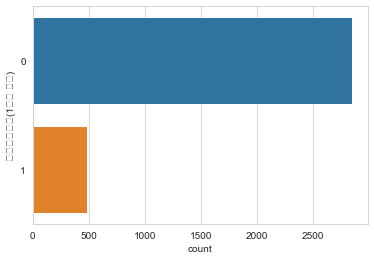

In [29]:
import matplotlib.pyplot as plt

sns.countplot(y='가입해지여부(1이면 해지)', data=phone);

한글을 읽지 못하여서 한글폰트를 지정해줬습니다.

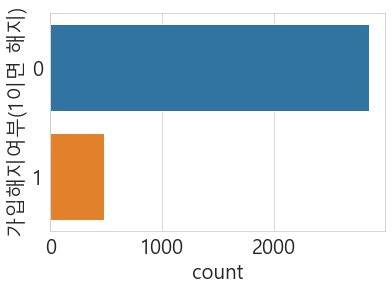

In [30]:
import matplotlib.pyplot as plt
plt.rc('font', family="Malgun Gothic",size='20')
sns.countplot(y='가입해지여부(1이면 해지)', data=phone);

해지를 하지 않은 사람들이 훨씬 많다는걸 알 수 있습니다.

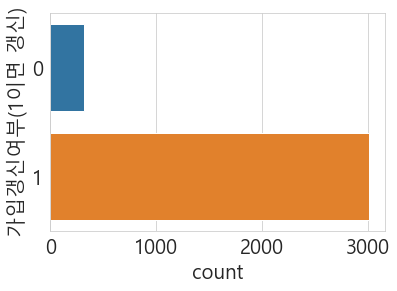

In [31]:
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic",size='20')
sns.countplot(y='가입갱신여부(1이면 갱신)', data=phone);

갱신을 한사람들이 많다는걸 알 수 있습니다.

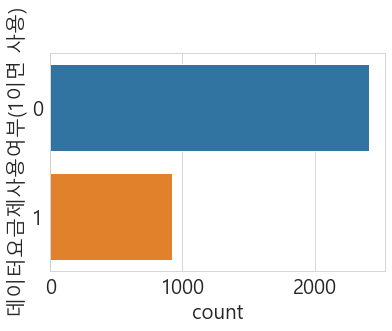

In [32]:
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic",size='20')
sns.countplot(y='데이터요금제사용여부(1이면 사용)', data=phone);

생각보다 데이터요금제사용을 적게 한다는 것을 알 수 있습니다.

In [33]:
phone.groupby('데이터요금제사용여부(1이면 사용)')['월평균요금'].median()

데이터요금제사용여부(1이면 사용)
0    49.000
1    75.875
Name: 월평균요금, dtype: float32

데이터 사용요금제 사용여부별로 월평균 요금이 얼마인지 알아보니 확실히 데이터요금제를 사용하지 않는 사람들의 평균(49.0)이
데이터 요금제를 사용하는 사람들(75.9)보다 적게 나온다는 것을 알 수 있습니다.

min, median, max 값만 보고 싶어 aggregate를 사용해서 봤습니다.

In [34]:
phone.groupby('데이터요금제사용여부(1이면 사용)')['데이터사용량(GB)'].aggregate([min, np.median, max]) 

,min,median,max
데이터요금제사용여부(1이면 사용),,,
0,0.0,0.000000,0.509766
1,0.0,2.779297,5.398438


데이터요금제를 사용하는 사람들이 확실히 데이터 사용량이 높은것으로 나왔습니다.

In [35]:
phone.groupby('가입해지여부(1이면 해지)')['가입기간'].describe()

,count,mean,std,min,25%,50%,75%,max
가입해지여부(1이면 해지),,,,,,,,
0,2850.0,100.793684,39.88235,1.0,73.0,100.0,127.0,243.0
1,483.0,102.664596,39.46782,1.0,76.0,103.0,127.0,225.0


해지하지 않은 사람들이 더 많지만 해지를 했을 경우 확실히 최종 가입기간이 적은 것을 확인할 수 있습니다.

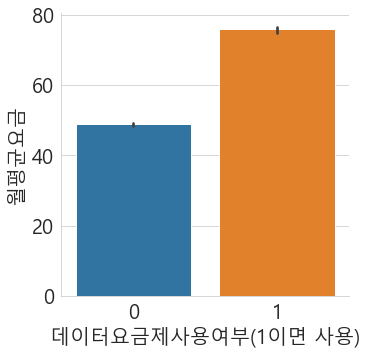

In [36]:
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic",size='20')
sns.catplot(x='데이터요금제사용여부(1이면 사용)', y='월평균요금',
kind='bar',
            data=phone)

시각화를 통해 그래프로 비교해보니 데이터 요금제사용여부에 따라 월평균요금이 차이나는게 잘보였습니다.

In [37]:
phone.query("월평균요금 > 50").groupby('데이터요금제사용여부(1이면 사용)').median()

,가입기간,데이터사용량(GB),고객센터전화량,월평균전화량(분),월평균전화수(횟수),월평균요금,초과요금,로밍시간(분)
데이터요금제사용여부(1이면 사용),,,,,,,,
0,100,0.000000,1,221.125,101,56.8125,10.929688,10.101562
1,101,2.779297,1,183.000,100,76.3750,10.265625,10.296875


월평균 요금이 50초과인 데이터요금제사용여부(1이면 사용) 별로 구분을 했고 평균을 구해보니 데이터요금제사용하지 않는 사람들의 월평균요금은 56.8 이 나왔고 데이터요금제사용하는 사람들의 월평균 요금은 76.4가 나왔습니다.

In [38]:
phone.query("가입기간 < 40").groupby('가입해지여부(1이면 해지)').median()

,가입기간,데이터사용량(GB),고객센터전화량,월평균전화량(분),월평균전화수(횟수),월평균요금,초과요금,로밍시간(분)
가입해지여부(1이면 해지),,,,,,,,
0,27,0.0,1,178.75,100,52.0,10.187500,9.703125
1,24,0.0,2,211.50,101,63.5,10.359375,10.546875


가입기간이 40일 미만인 가입해지여부(1이면 해지) 별로 구분을 했고 평균을 구해보니 해지를 하지않은 사람들의 가입기간 평균은 27일
해지를 한 사람들의 가입기간 평균은 24일로 나왔습니다.

In [39]:
phone.groupby(['가입해지여부(1이면 해지)', '가입갱신여부(1이면 갱신)'])['가입기간'].mean().unstack()
#unstack해줘서 데이터 프레임 형식으로 보여준다.

가입갱신여부(1이면 갱신),0,1
가입해지여부(1이면 해지),,
0,103.456989,100.607733
1,104.905109,101.777457


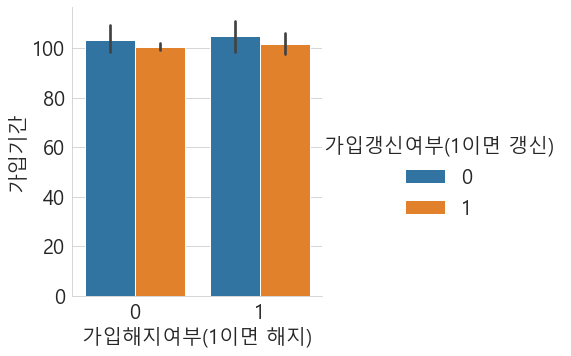

In [40]:
import matplotlib.pyplot as plt

plt.rc('font', family="Malgun Gothic",size='20')
sns.catplot(x='가입해지여부(1이면 해지)', y='가입기간',
            hue='가입갱신여부(1이면 갱신)', kind='bar',
            data=phone)

가입기간이 가입 해지여부와 갱신여부에 따라 가입기간의 평균 차이가 있을 줄 았았지만 막상 분석해보고 시각화해보니
별로 영향력을 주지 않는다는 것을 알게 되었습니다.

unstack해줘서 데이터 프레임 형식으로 확인했습니다ㅏ

In [41]:
phone.groupby(['데이터요금제사용여부(1이면 사용)', '가입해지여부(1이면 해지)'])['월평균요금'].mean().unstack()

가입해지여부(1이면 해지),0,1
데이터요금제사용여부(1이면 사용),,
0,47.474976,55.491936
1,75.708580,77.823044


가입해지하지 않은 사람들과 해지한사람들이 데이터 요금제 사용시 월평균 요금은 데이터 요금제 사용하지않는 사람들보다 높은것으로 나왔다.

nunique를 이용 월평균요금에 몇개의 값들이 들어있는지 확인하기.

In [42]:
phone.월평균요금.nunique()

627

627개의 값들을 가지고 있습니다.

In [43]:
phone.월평균요금.value_counts()

50.00000     84
46.00000     75
45.00000     74
49.00000     73
54.00000     72
             ..
47.90625      1
96.31250      1
57.59375      1
46.50000      1
105.18750     1
Name: 월평균요금, Length: 627, dtype: int64

월평균요금이 50인경우가 84 명으로 제일 많았고 그다음은 46,45 순으로 보통 40~60 사이 요금을 사용하는것으로 보입니다.

In [44]:
top_n = phone.월평균요금.value_counts().index[:6]

top_n을 월평균요근의 상위 6개로 지정해줬습니다.

In [45]:
top_n

Float64Index([50.0, 46.0, 45.0, 49.0, 54.0, 51.0], dtype='float64')

In [46]:
phone.월평균요금.where(phone.월평균요금.isin(top_n), 'Other').value_counts()

Other    2884
50.0       84
46.0       75
45.0       74
49.0       73
54.0       72
51.0       71
Name: 월평균요금, dtype: int64

위에서 지정해준 top_n을 value_counts해보니 상위 6개의 값들만 볼 수 있습니다.

그림사이즈는 10,8로 지정했고 앞서 저장한 top_n을 활용하고 그외의 값들은 other로 지정했습니다.

<AxesSubplot:xlabel='count', ylabel='월평균요금'>

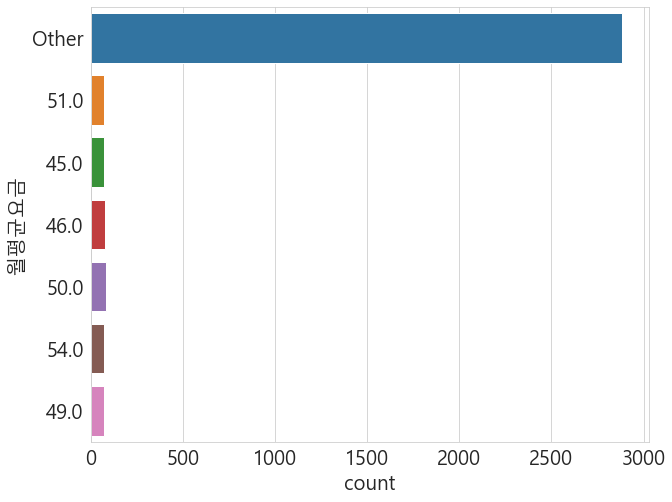

In [47]:
import matplotlib.pyplot as plt # 이 부분은 관용적으로 이렇게 씁니다.
plt.rc('font', family="Malgun Gothic",size='20')

fig, ax = plt.subplots(figsize=(10, 8))
top_n = phone.월평균요금.value_counts().index[:6]
sns.countplot(y='월평균요금',
 data=(phone.assign(
 월평균요금=phone.월평균요금.where(phone.월평균요금.isin(top_n), 'Other'))
 )
 )

하지만 평균 요금보다 other이 너무 강조되어 지웠습니다.

<AxesSubplot:xlabel='count', ylabel='월평균요금'>

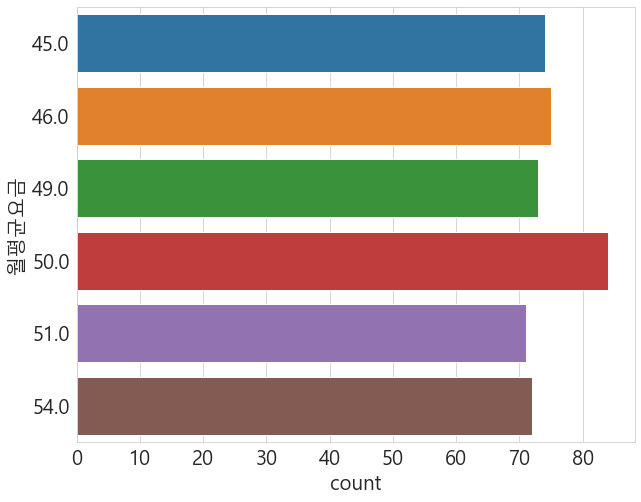

In [48]:
import matplotlib.pyplot as plt # 이 부분은 관용적으로 이렇게 씁니다.
plt.rc('font', family="Malgun Gothic",size='20')

fig, ax = plt.subplots(figsize=(10, 8))
top_n = phone.월평균요금.value_counts().index[:6]
sns.countplot(y='월평균요금',
 data=(phone.assign(
 월평균요금=phone.월평균요금.where(phone.월평균요금.isin(top_n)))
 )
 )

대체적으로 40~60사이의 요금들이 주를 이루는것을 볼 수 있습니다.

느낀점

이번 프로그래밍을 통해 데이터 파일을 notebook으로 어떻게 분석해보고 또 내가 보고싶은 것들끼리 분류해서 보면서 다양하게 시도해봤고
시각화도해보면서 앞으로 어떻게 데이터를 분석해보고 시각화해야할지 또 전처리는 어떻게 해야할지 조금씩 알아갔습니다.
편입생으로써 어려운 부분도 많았지만 교수님 덕분에 차근차근 따라해가며 조금씩 두려움을 없앨 수 있었습니다.
한학기동안 고생많으셨습니다. 감사합니다.